In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import*

In [58]:
dt=pd.read_csv("heart-disease.csv")

In [10]:
dt



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='target'>

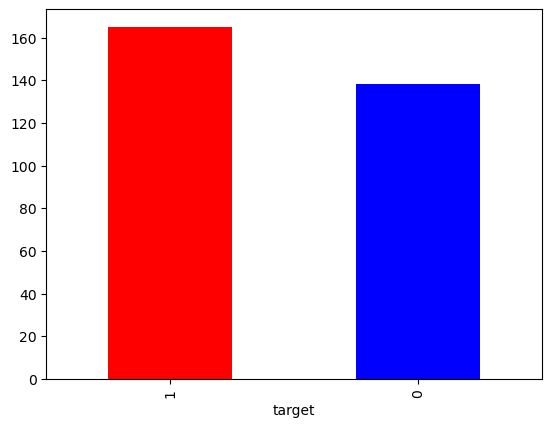

In [19]:
dt["target"].value_counts().plot(kind="bar",color=["red", "blue"] )

In [26]:
pd.crosstab(dt.sex,dt.target)

target,0,1
sex,,
0,24,72
1,114,93


In [17]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

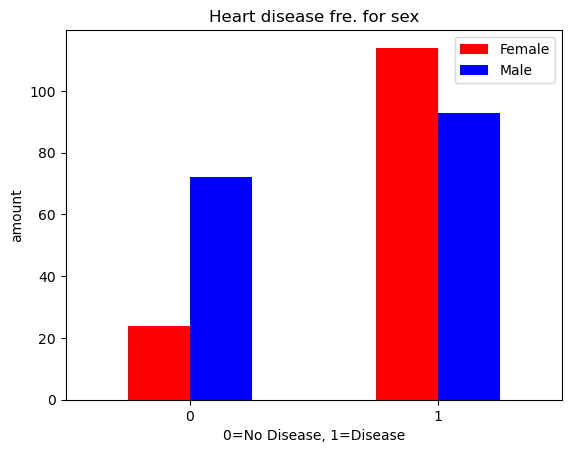

In [20]:
pd.crosstab(dt.sex, dt.target).plot(kind="bar" ,color=["red", "blue"])
plt.title("Heart disease fre. for sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [27]:
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


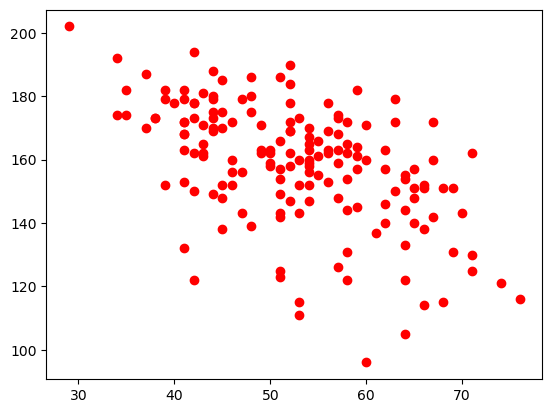

In [21]:
plt.scatter(dt.age[dt.target==1], dt.thalach[dt.target==1],
           c="red")

NameError: name 'sns' is not defined

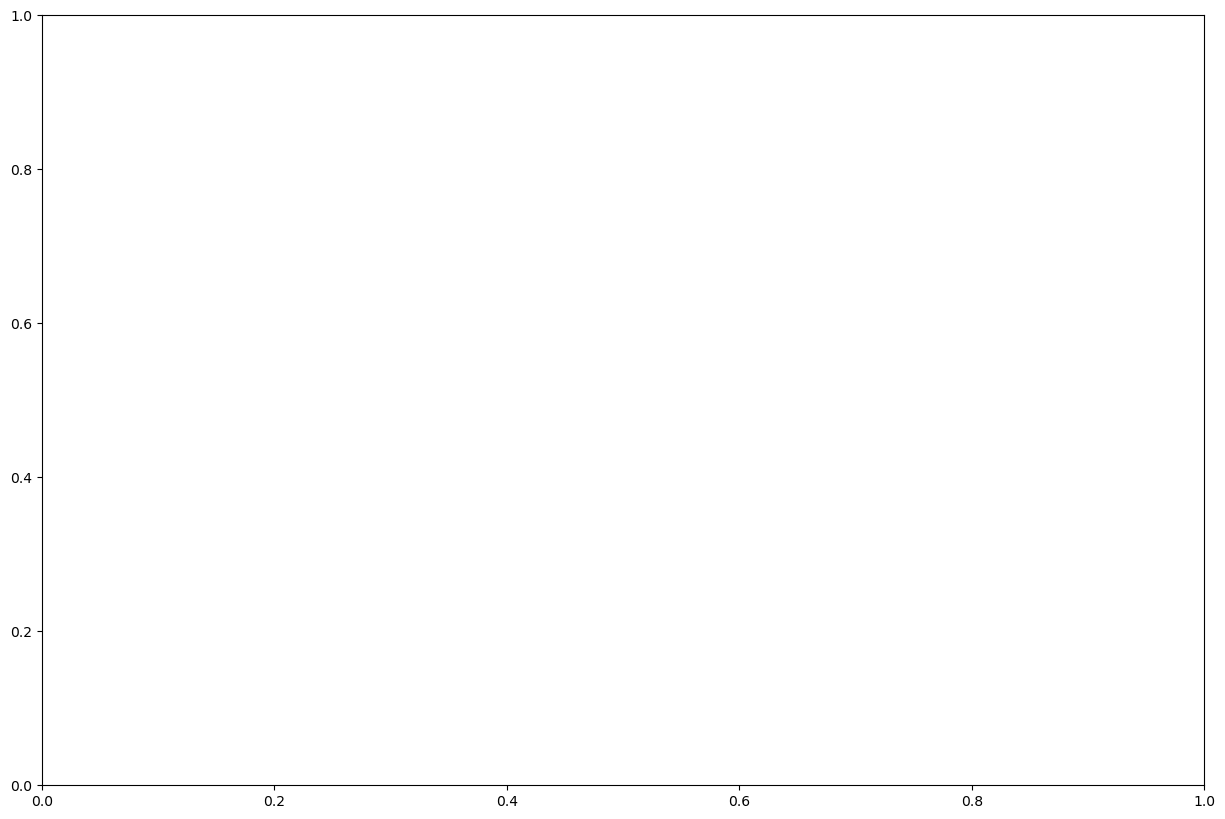

In [34]:
corrmat=dt.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corrmat,annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [35]:
x= dt.drop("target", axis=1)

In [37]:
y=dt.target

In [41]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [43]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size= 0.2)

In [39]:
models={"LR":LogisticRegression(),
"KNN":KNeighborsClassifier(),
       "RF":RandomForestClassifier()}


In [40]:
def fit_in(models,xtrain,xtest,ytrain,ytest):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(xtrain, ytrain)
        model_scores[name]=model.score(xtest,ytest)
    return model_scores
    

In [33]:
model_scores=fit_in(models,xtrain,xtest,ytrain,ytest)
model_scores

C:\Users\Inzayn\Desktop\new_p\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8852459016393442, 'KNN': 0.6885245901639344, 'RF': 0.8360655737704918}

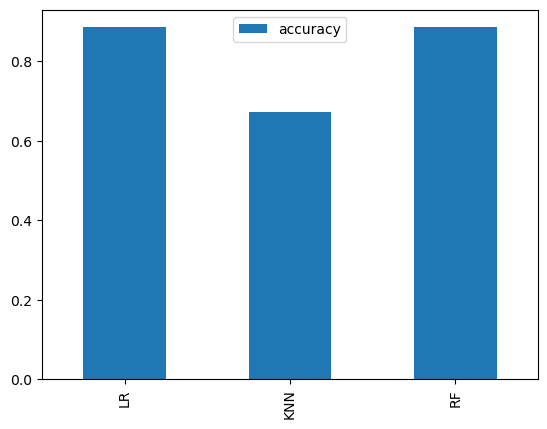

In [57]:
model_accuracy=pd.DataFrame(model_scores, index=["accuracy"])
model_accuracy.T.plot.bar();

In [51]:
#creating a grid to tune LR
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
#for Rf
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None, 3, 5, 10],
        "min_sample_split":np.arange(2,20,2),
        "max_sample_split":np.arange(1,20,2)
}




In [53]:
np.random.seed(42)
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [54]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [55]:
rs_log_reg.score(xtest, ytest)

0.8688524590163934

In [62]:
y_preds=rs_log_reg.predict(xtest)
                          

In [63]:
y_preds

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [64]:
print(classification_report(ytest, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [65]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [66]:
clf= LogisticRegression(C=0.23357214690901212,
                       solver="liblinear")

In [67]:
cv_acc= cross_val_score(clf,
                            x,y,cv=5,
                            scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [68]:
mean_acc=np.mean(cv_acc)

In [71]:
cv_precision= cross_val_score(clf,
                            x,y,cv=5,
                            scoring="precision")
cv_precision=np.mean(cv_precision)

In [72]:
cv_recall= cross_val_score(clf,
                            x,y,cv=5,
                            scoring="recall")
cv_recall=np.mean(cv_recall)

In [73]:
cv_f1= cross_val_score(clf,
                            x,y,cv=5,
                            scoring="f1")
cv_f1=np.mean(cv_f1)

In [74]:
cv_metrics= pd.DataFrame({"Accuracy": mean_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1":cv_f1},
                        index=[0])

<Axes: title={'center': 'Cross Validated Classification Matrix'}>

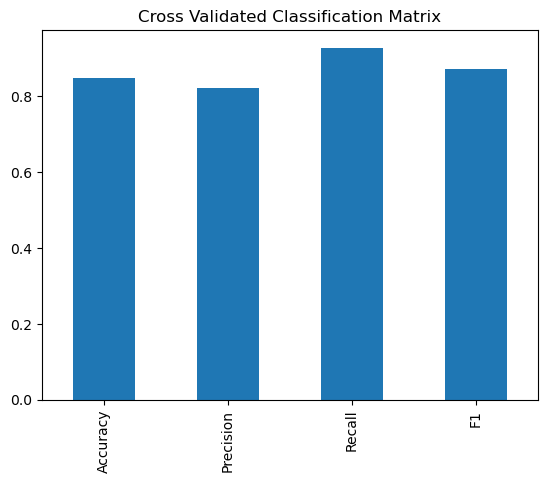

In [76]:
cv_metrics.T.plot.bar(title="Cross Validated Classification Matrix", legend=False)

In [77]:
###features Importent

In [78]:
clf.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [79]:
clf= LogisticRegression(C=0.23357214690901212,
                       solver="liblinear")
clf.fit(xtrain, ytrain)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [80]:
clf.coef_

array([[ 0.01826208, -0.94725405,  0.68147369, -0.02014988, -0.00161703,
         0.02783199,  0.42387004,  0.02627745, -0.55306323, -0.58216815,
         0.42914892, -0.61027612, -0.59441568]])

In [82]:
feature_dict= dict(zip(dt.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.018262076002108208,
 'sex': -0.9472540480194135,
 'cp': 0.6814736878090571,
 'trestbps': -0.02014987659307998,
 'chol': -0.0016170275624160372,
 'fbs': 0.02783199133106707,
 'restecg': 0.42387003866046785,
 'thalach': 0.02627745208637977,
 'exang': -0.5530632293454658,
 'oldpeak': -0.5821681499494467,
 'slope': 0.42914891600406746,
 'ca': -0.6102761188557556,
 'thal': -0.5944156841654666}

<Axes: title={'center': 'Feature Importence'}>

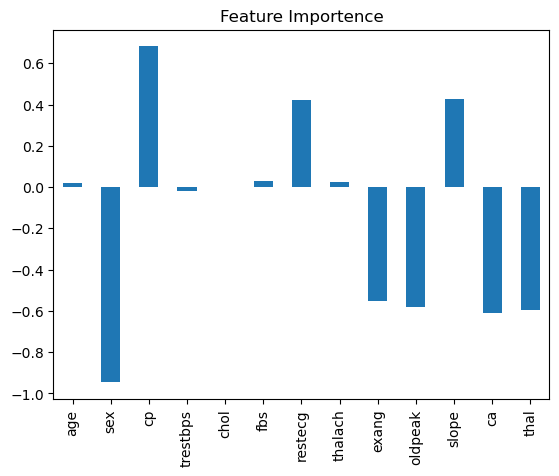

In [84]:
feature_dt=pd.DataFrame(feature_dict, index=[0])
feature_dt.T.plot.bar(title="Feature Importence",legend=False)